# Analyzing simplified HBEC dataset with Pandas/Numpy

Pandas HBEC dataset tasks


In [1]:
# TODO: Import things you need, I imported Pandas for you
import pandas as pd
from pandas import concat
import numpy as np
from itertools import product
import tabulate
import enum 
import matplotlib.pyplot as plt 
import math

In [4]:
data_path = '~/Data/'

### Read the dataset

The Pandas HBEC dataset (toy_hbec.csv) has 5317 rows (cells) and 2993 columns. The first two columns are called “stim” and “cell_type”, and it indicates the stimulation condition and the cell type, respectively. 

In [5]:
hbec_df = pd.read_csv(data_path + 'toy_hbec.csv',index_col=0)

In [6]:
hbec_df

,stim,cell_type,HES4,ISG15,TTLL10,SDF4,AURKAIP1,MRPL20,SSU72,GNB1,...,SLC6A8,BCAP31,IDH3G,SSR4,NAA10,RPL10,AC244090.1,ATP6AP1,FAM50A,RPS4Y1
AAACCCAGTTCCTTGC-1,beta,basal,7.0,38.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,0.0,1.0,8.0,2.0,50.0,0.0,0.0,0.0,5.0
AAACGAAAGTTGGAAT-1,beta,ciliated,5.0,33.0,2.0,0.0,4.0,4.0,1.0,0.0,...,0.0,6.0,2.0,4.0,1.0,15.0,6.0,5.0,2.0,4.0
AAACGCTAGAATCCCT-1,beta,ciliated,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
AAACGCTGTAATGTGA-1,beta,ciliated,8.0,129.0,2.0,1.0,3.0,1.0,0.0,0.0,...,0.0,1.0,1.0,8.0,1.0,53.0,0.0,0.0,1.0,1.0
AAACGCTGTACCGTCG-1,control,ciliated,6.0,5.0,3.0,1.0,6.0,3.0,1.0,2.0,...,0.0,3.0,3.0,5.0,1.0,19.0,3.0,3.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCATCACGGC-4,beta,basal,4.0,107.0,0.0,1.0,0.0,2.0,3.0,0.0,...,0.0,4.0,4.0,5.0,0.0,54.0,0.0,1.0,0.0,8.0
TTTGATCTCGTGTTCC-4,beta,basal,25.0,121.0,0.0,0.0,8.0,6.0,1.0,2.0,...,1.0,4.0,0.0,9.0,3.0,63.0,0.0,0.0,3.0,3.0
TTTGGAGTCGTAGTGT-4,beta,ciliated,0.0,32.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
TTTGTTGAGGTGCAGT-4,beta,ciliated,4.0,388.0,3.0,0.0,2.0,3.0,0.0,1.0,...,0.0,2.0,1.0,5.0,0.0,9.0,1.0,0.0,1.0,2.0


### 1. Mean expression for every group of cells

Calculate the mean expression of every gene for each combination of stimulation and cell type. For example, what is the mean expression of the HES4 gene for “basal” cells stimulated with “beta” interferon?

In [7]:
all_cell_types = ['ciliated', 'goblet', 'basal']
all_stim=['beta', 'control']
combo=list(product(all_cell_types,all_stim))
print(combo)

[('ciliated', 'beta'), ('ciliated', 'control'), ('goblet', 'beta'), ('goblet', 'control'), ('basal', 'beta'), ('basal', 'control')]


In [46]:
for i,j in combo:
    Table=hbec_df.loc[(hbec_df.cell_type==i)& (hbec_df.stim==j),:]
    tablewmeans=Table.mean()
    print(tablewmeans)

HES4            4.815801
ISG15         103.504740
TTLL10          2.592777
SDF4            0.502483
AURKAIP1        3.441986
                 ...    
RPL10          21.988262
AC244090.1      2.334086
ATP6AP1         1.193679
FAM50A          0.936795
RPS4Y1          3.526862
Length: 2991, dtype: float64
HES4           2.533081
ISG15          7.202268
TTLL10         2.816635
SDF4           0.565217
AURKAIP1       4.584121
                ...    
RPL10         20.686200
AC244090.1     4.752363
ATP6AP1        1.553875
FAM50A         1.264650
RPS4Y1         4.272212
Length: 2991, dtype: float64
HES4           12.415929
ISG15         123.991150
TTLL10          0.154867
SDF4            0.561947
AURKAIP1        1.922566
                 ...    
RPL10          44.933628
AC244090.1      0.181416
ATP6AP1         0.369469
FAM50A          0.570796
RPS4Y1          3.774336
Length: 2991, dtype: float64
HES4           3.0
ISG15          3.0
TTLL10         0.0
SDF4           0.0
AURKAIP1       3.0
    

In [47]:
listsm=[]
for i,j in combo:
    Table=hbec_df.loc[(hbec_df.cell_type==i)& (hbec_df.stim==j),:]
    Table=Table.mean()
    listsm.append(Table)
    
    #tablewmeans=Table.mean(len(hbec_df.loc[(hbec_df.cell_type==i)& (hbec_df.stim==j),:]))
    #tablewmean=tablewmeans.extend(tablewmeans)
    #tablewmeans=list(tablewmeans)
    #tablewmeans=tablewmeans.concat()
    #tablewmeans=pd.DataFrame(tablewmeans)



In [10]:
# names = [i+'-'+j for i,j in combo]

names = [f'{i}-{j}' for i,j in combo]

In [11]:
finalmeantable=pd.DataFrame(listsm, index=names)
finalmeantable

,HES4,ISG15,TTLL10,SDF4,AURKAIP1,MRPL20,SSU72,GNB1,FAAP20,RER1,...,SLC6A8,BCAP31,IDH3G,SSR4,NAA10,RPL10,AC244090.1,ATP6AP1,FAM50A,RPS4Y1
ciliated-beta,4.815801,103.504740,2.592777,0.502483,3.441986,3.049210,1.590519,1.043792,0.994131,1.944921,...,0.453273,1.802257,0.880361,5.322348,0.941761,21.988262,2.334086,1.193679,0.936795,3.526862
ciliated-control,2.533081,7.202268,2.816635,0.565217,4.584121,3.952741,2.005671,1.158790,1.226843,2.417769,...,0.211720,2.060491,1.081285,5.495274,1.289225,20.686200,4.752363,1.553875,1.264650,4.272212
goblet-beta,12.415929,123.991150,0.154867,0.561947,1.922566,1.911504,1.283186,0.597345,0.920354,1.238938,...,0.433628,1.389381,0.705752,13.462389,0.699115,44.933628,0.181416,0.369469,0.570796,3.774336
goblet-control,3.000000,3.000000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,...,3.000000,0.000000,0.000000,7.000000,1.000000,53.000000,0.000000,1.000000,1.000000,2.000000
basal-beta,5.413314,100.675287,0.053161,0.468870,2.074713,1.833812,0.909962,0.607759,1.038793,1.001437,...,0.547893,1.689176,0.645115,3.943487,0.833812,56.386015,0.079502,0.348659,0.393199,5.195881
basal-control,4.062500,4.187500,0.093750,0.718750,2.843750,2.937500,1.250000,0.718750,1.187500,1.875000,...,0.593750,2.281250,0.781250,5.281250,1.281250,70.750000,0.250000,0.625000,0.937500,5.750000


### 2. Same as above, but for variance instead of the mean.

In [12]:
listsv=[]
for i,j in combo:
    Tablev=hbec_df.loc[(hbec_df.cell_type==i)& (hbec_df.stim==j),:]
    Tablevar=Tablev.drop(['stim','cell_type'], axis=1)
    tbvar=Tablevar.var()
    tbvar=tbvar.fillna(0)
    listsv.append(tbvar)
    pd.DataFrame(listsv)


In [21]:
finalvartable=pd.DataFrame(listsv,index=names)


In [18]:
##CV
SD=np.sqrt(finalvartable)
SD

,HES4,ISG15,TTLL10,SDF4,AURKAIP1,MRPL20,SSU72,GNB1,FAAP20,RER1,...,SLC6A8,BCAP31,IDH3G,SSR4,NAA10,RPL10,AC244090.1,ATP6AP1,FAM50A,RPS4Y1
ciliated-beta,5.762730,107.557194,2.156133,0.748904,2.995201,2.668498,1.623506,1.207615,1.188420,1.913353,...,1.267856,1.734317,1.082691,4.980170,1.086895,21.192409,2.675019,1.307319,1.097165,3.519988
ciliated-control,2.738499,14.400873,2.241657,0.809508,3.343500,2.988557,1.680426,1.140393,1.170000,2.000319,...,0.511769,1.754898,1.178649,3.972023,1.386316,14.383012,3.920266,1.478837,1.276944,3.372909
goblet-beta,7.848596,74.407608,0.623201,0.792517,1.563362,1.739371,1.326643,0.819276,1.000147,1.222656,...,1.121261,1.263042,0.880769,7.866452,0.817057,23.512511,0.535075,0.586807,0.774789,3.246346
goblet-control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
basal-beta,6.027103,55.410269,0.230725,0.702510,1.834079,1.618848,1.028830,0.829428,1.106209,1.170840,...,1.022790,1.533100,0.851175,2.622315,0.992867,24.356607,0.282709,0.592307,0.705303,3.708528
basal-control,4.079354,3.779721,0.296145,0.924030,1.868402,2.154328,1.344043,1.142560,1.148281,1.718026,...,0.910844,2.003777,1.007532,4.073790,1.224333,43.126221,0.508001,0.941858,0.877588,4.204452


<BarContainer object of 2991 artists>

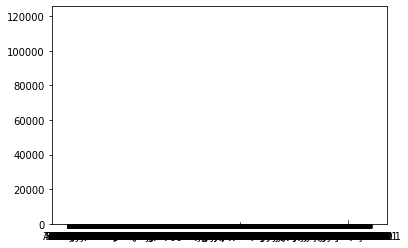

In [15]:
plt.bar(finalvartable.columns, finalvartable.iloc[0,:], .4)

<BarContainer object of 2991 artists>

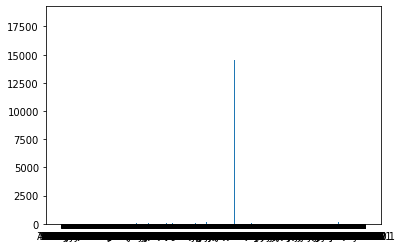

In [16]:
plt.bar(finalvartable.columns, finalvartable.iloc[1,:],0.4)


### 3. For each combination of stim and cell type, calculate the number of genes with > 0.05 mean expression.

In [11]:
listge=[]
for x in names:
    ge=finalmeantable.loc[x,:]>3
    amount=ge.sum()
    listge.append(amount)

In [41]:
listge=pd.DataFrame(listge,index=names)
listge

,0
ciliated-beta,589
ciliated-control,681
goblet-beta,427
goblet-control,328
basal-beta,405
basal-control,443


### 4.  For specifically “basal” cells and all genes, calculate the difference in means between “control” stimulation cells and “beta” stimulation cells. Report the 50 genes with the greatest absolute difference.

In [12]:
# TODO: Solve 4
a=finalmeantable.loc['basal-beta']-finalmeantable.loc['basal-control']
absvala=a.abs()
absvala=absvala.sort_values(ascending=False)
absvala.head(3)

MALAT1    141.133621
S100A2    125.771073
ISG15      96.487787
dtype: float64

In [79]:
import seaborn as sns

In [14]:
qfhbec_df=finalmeantable.loc[:,['MALAT1','S100A2','ISG15']]
qfhbec_df

,MALAT1,S100A2,ISG15
ciliated-beta,314.995937,4.385553,103.504740
ciliated-control,241.030246,1.897921,7.202268
goblet-beta,296.931416,3.048673,123.991150
goblet-control,138.000000,0.000000,3.000000
basal-beta,266.991379,92.478927,100.675287
basal-control,408.125000,218.250000,4.187500


([<matplotlib.axis.XTick at 0x7fdbca6d8550>,
 [Text(0.1, 0, 'MALAT1'), Text(1.1, 0, 'S100A2'), Text(2.1, 0, 'ISG15')])

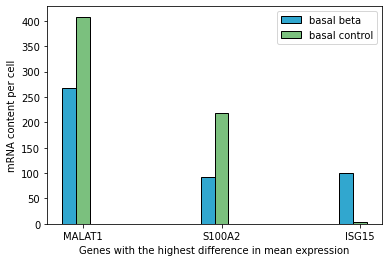

In [81]:
ciliated_beta=list(qfhbec_df.iloc[0,:])
ciliated_control=list(qfhbec_df.iloc[1,:])
goblet_beta=qfhbec_df.iloc[2,:]
goblet_control=qfhbec_df.iloc[3,:]
basal_beta=qfhbec_df.iloc[4,:]
basal_control=qfhbec_df.iloc[5,:]
width=0.1
x=np.arange(3)
plt.bar(x, basal_beta, color= '#31A7CF', width=0.1, edgecolor='black', label='basal beta')
plt.bar(x + width, basal_control, color= '#7BC07E', width=0.1, edgecolor='black', label='basal control')
plt.legend()
plt.xlabel('Genes with the highest difference in mean expression')
plt.ylabel('mRNA content per cell')
plt.xticks(x+width,['MALAT1', 'S100A2', 'ISG15'])

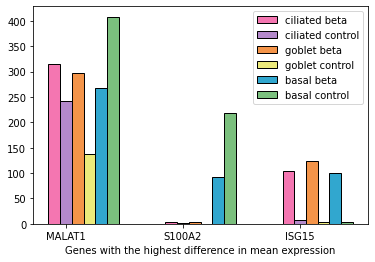

In [76]:
plt.bar(x, ciliated_beta, color= '#F476B1', width=0.1, edgecolor='black', label='ciliated beta')
plt.bar(x+width, ciliated_control, color='#B489CB', width=0.1, edgecolor='black', label='ciliated control')
plt.bar(x+width*2, goblet_beta, color='#F49449', width=0.1, edgecolor='black', label='goblet beta')
plt.bar(x+width*3,goblet_control, color= '#ECEA7B', width=0.1, edgecolor='black', label='goblet control')
plt.bar(x+width*4, basal_beta, color= '#31A7CF', width=0.1, edgecolor='black', label='basal beta')
plt.bar(x + width*5, basal_control, color= '#7BC07E', width=0.1, edgecolor='black', label='basal control')
plt.xticks(x+width,['MALAT1', 'S100A2', 'ISG15'])
plt.legend()

In [23]:
###Calculate housekeeping genes

In [85]:
jhhb=[]
CV=SD/tablewmeans
cccv=CV.loc['ciliated-control',:].sort_values().head(50)
bccv=CV.loc['basal-control',:].sort_values().head(50)
#pd.DataFrame(cccv)
#pd.DataFrame(bccv)
#cccv.append(bccv)
#housekeeping=cccv.index

In [83]:
hktable=finalmeantable.loc[:,housekeeping]

<AxesSubplot:>

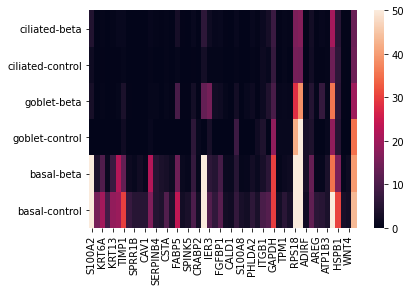

In [86]:
sns.heatmap(hktable, vmax=50)